In [37]:
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
def stock_vis_stats(stock_n, df):
    print(stock_n)
    display(df[["mse", "mae", "rse"]].describe(include='all'))

def stock_vis_plot(df, metric=None):

    plt.figure(figsize=(10, 6))
    
    for w_l in df['window_l'].unique():
        subset = df[df['window_l'] == w_l]
        plt.plot(subset['pred_l'], subset[metric], marker='o', label=f'sl={w_l}')
    
    plt.title(f'{metric.upper()} vs Prediction Length for different Sequence Lengths')
    plt.xlabel('Prediction Length (pl)')
    plt.ylabel(metric.upper())
    plt.legend()
    plt.grid(True)
    plt.show()

def stock_vis(stock_name, df_list):
    stock_vis_stats(stock_name, df_list[stock_name])
    for metric in ['mse', 'mae', 'rse']:
        stock_vis_plot(df_list[stock_name] ,metric=metric)

In [42]:
raw_file = open("result.txt", 'r')
raw_str = raw_file.read()
#print(raw_str)

raw_str = raw_str.strip().split('\n')

for i in raw_str:
    if i == '':
        raw_str.remove(i)

# print(len(raw_str))
# print(raw_str[:10])

parsed_data = []

for i in range(0, len(raw_str), 2):

    header = raw_str[i].split('_')
    metrics = raw_str[i + 1].split(',')

    stock_name = header[1]
    window_length = header[2]
    pred_length = header[3]
    model = header[4]

    mse = float(metrics[0].split(":")[1])
    mae = float(metrics[1].split(":")[1])
    rse = float(metrics[2].split(":")[1])

    parsed_data.append({ "stock": stock_name, "window_l": window_length, "pred_l": pred_length, "model": model, "mse": mse, "mae": mae, "rse": rse})





,stock,window_l,pred_l,model,mse,mae,rse
0,000001SZ,50,1,PatchTST,0.710249,0.622147,1.017885
1,000001SZ,50,7,PatchTST,0.709819,0.623442,1.014803
2,000001SZ,50,14,PatchTST,0.713623,0.625320,1.016539
3,000001SZ,50,30,PatchTST,0.711662,0.624347,1.014063
4,000001SZ,100,1,PatchTST,0.718915,0.633814,1.024076
...,...,...,...,...,...,...,...
1515,000895SZ,300,7,PatchTST,0.482408,0.523145,1.062439
1516,000895SZ,300,14,PatchTST,0.491248,0.527226,1.062113
1517,000895SZ,300,30,PatchTST,0.483696,0.524341,1.054353
1518,000895SZ,500,1,PatchTST,0.481445,0.524210,1.060977


000156SZ


,mse,mae,rse
count,20.000000,20.000000,20.000000
mean,0.012918,0.081835,1.040343
std,0.001093,0.004261,0.043838
min,0.012368,0.078971,1.006671
25%,0.012457,0.079718,1.022724
50%,0.012555,0.080650,1.030178
75%,0.012698,0.081271,1.035733
max,0.017186,0.097796,1.205167


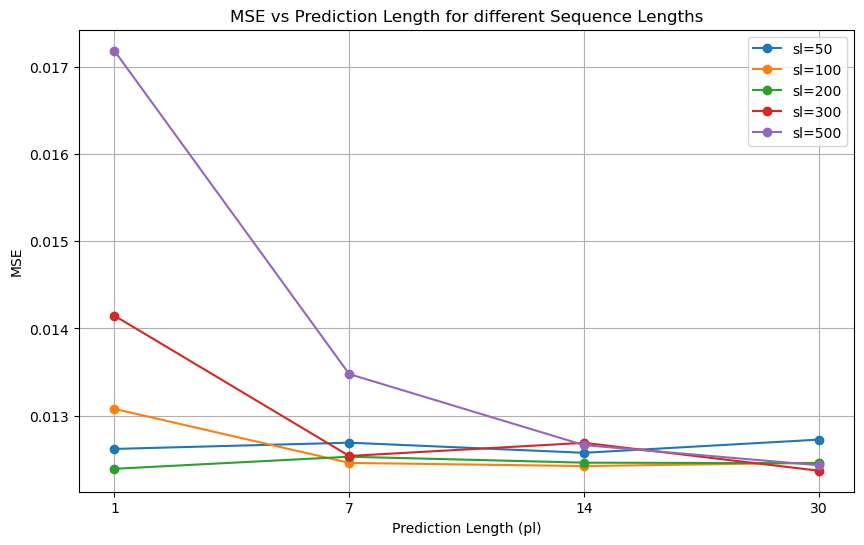

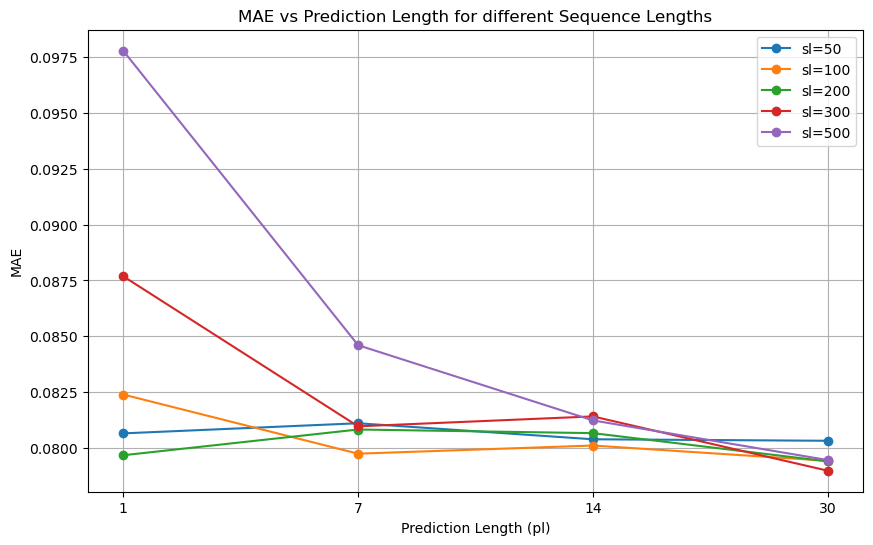

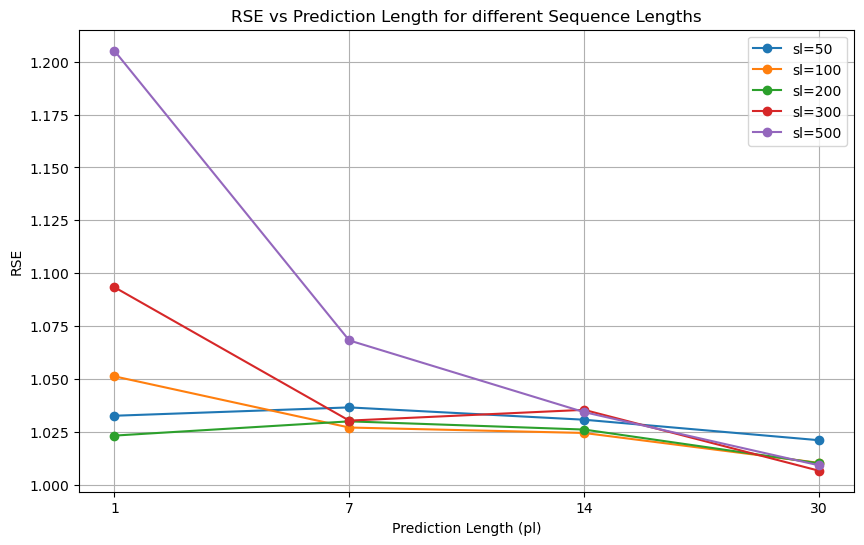

000001SZ


,mse,mae,rse
count,20.000000,20.000000,20.000000
mean,0.725121,0.632934,1.025546
std,0.018898,0.011789,0.014130
min,0.706507,0.620700,1.010384
25%,0.711308,0.624498,1.016105
50%,0.717977,0.627616,1.020533
75%,0.733570,0.639571,1.031640
max,0.775714,0.660657,1.063761


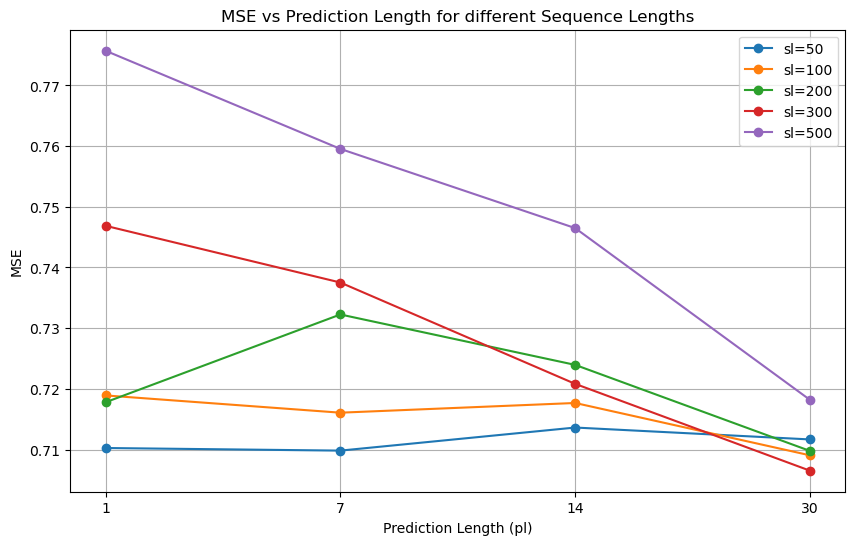

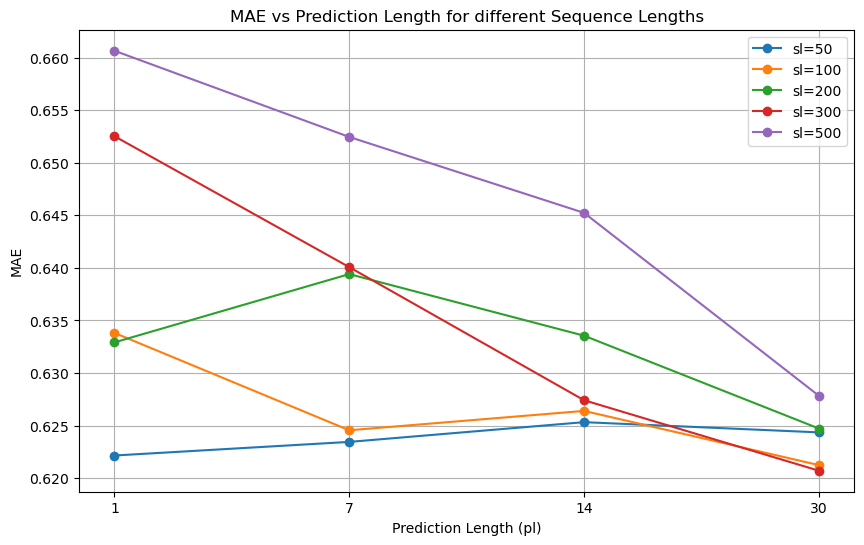

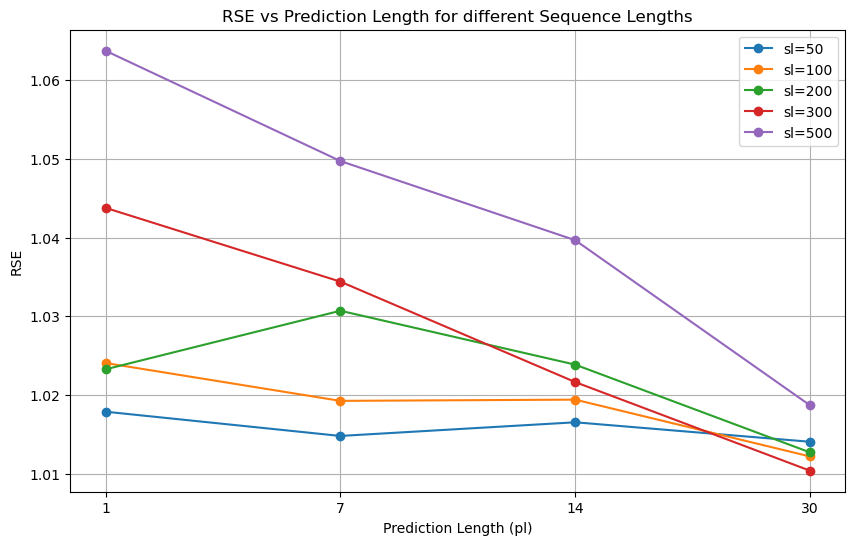

In [43]:
raw_df = pd.DataFrame(parsed_data)

df_list = {}

for stock_n, v in raw_df.groupby('stock'):
    df_list[stock_n] = v.copy().reset_index()




display(raw_df)


stock_vis("000156SZ", df_list)


for i in df_list.keys():

    stock_vis_stats(i, df_list[i])
    for metric in ['mse', 'mae', 'rse']:
        stock_vis_plot(df_list[i] ,metric=metric)
    break

    # print("Stock : %s"%(i))
    # display(df_list[i][["mse", "mae", "rse"]].describe(include='all'))

# df_list["000002SZ"][["mse", "mae", "rse"]].describe(include='all')

# Result display

In [ ]:
#find the lowest m